# Assess Population to Mental Health Provider Validity to Measure Mental Health

**Convergent:** correlation against poor mental health days  
**Divergent:** no correlation against urbanization level or RUCC code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

sns.set()

In [2]:
# Convergent
df = pd.read_csv("../../data/processed_data/full_df.csv")
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,April Average Precipitation,May Average Precipitation,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC
0,1,1,1001,AL,Autauga County,2010,1.0,9778.1,670.0,137881.0,...,2.17,5.72,2.47,3.38,4.38,1.38,3.14,5.01,1.89,2.0
1,1,3,1003,AL,Baldwin County,2010,1.0,8221.7,2148.0,449589.0,...,2.31,6.31,4.94,4.08,9.38,2.24,2.06,6.11,2.19,3.0
2,1,9,1009,AL,Blount County,2010,1.0,8929.7,787.0,155580.0,...,5.66,7.47,3.39,3.55,4.31,1.23,3.12,4.62,2.07,1.0
3,1,15,1015,AL,Calhoun County,2010,1.0,11526.2,2035.0,313874.0,...,3.73,6.46,2.70,4.00,3.78,1.55,2.96,3.06,2.24,3.0
4,1,31,1031,AL,Coffee County,2010,1.0,9004.7,645.0,126516.0,...,1.88,4.71,3.84,2.78,6.30,2.41,1.38,3.71,2.03,4.0


In [3]:
# Number of rows for each year
df[["Release Year", "Name"]].groupby(by="Release Year").count()

,Name
Release Year,
2010,844
2011,877
2012,873
2013,884
2014,896
2015,946
2016,960


## Convergent
### 1. Compute number of counties that have mental health providers value
documentation: https://www.countyhealthrankings.org/sites/default/files/media/document/2020%20Analytic%20Documentation_0.pdf

In [5]:
# Take a look at available values
df_mental_provider = df.dropna(subset=["Mental health providers raw value"])
interested_cols = ["State Abbreviation", "Name", "Release Year", "Mental health providers raw value",
                   "Mental health providers numerator", "Mental health providers denominator", "Ratio of population to mental health providers", "RUCC"]
df_mental_provider[interested_cols].head()

,State Abbreviation,Name,Release Year,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Ratio of population to mental health providers,RUCC
844,AL,Autauga County,2011,0.000020,1.0,50354.0,50354.0,2.0
845,AL,Baldwin County,2011,0.000165,29.0,176212.0,6076.0,3.0
846,AL,Calhoun County,2011,0.000106,12.0,113422.0,9452.0,3.0
847,AL,Cherokee County,2011,0.000000,0.0,24413.0,-24413.0,6.0
848,AL,Cullman County,2011,0.000049,4.0,81518.0,20380.0,4.0


In [6]:
# Count number of values we have for each year
df_mental_provider[interested_cols[2:]].groupby(by="Release Year").count()

,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Ratio of population to mental health providers,RUCC
Release Year,,,,,
2011,877,877,877,877,877
2012,873,873,873,873,873
2013,868,868,868,868,868
2015,945,945,945,945,945
2016,959,959,959,959,959


### 2. Convergence Validity
Code source: https://stackoverflow.com/questions/25579227/seaborn-implot-with-equation-and-r2-text

In [7]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Mental health providers raw value'], data['Poor mental health days raw value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

KeyError: 'Mental health providers raw value'

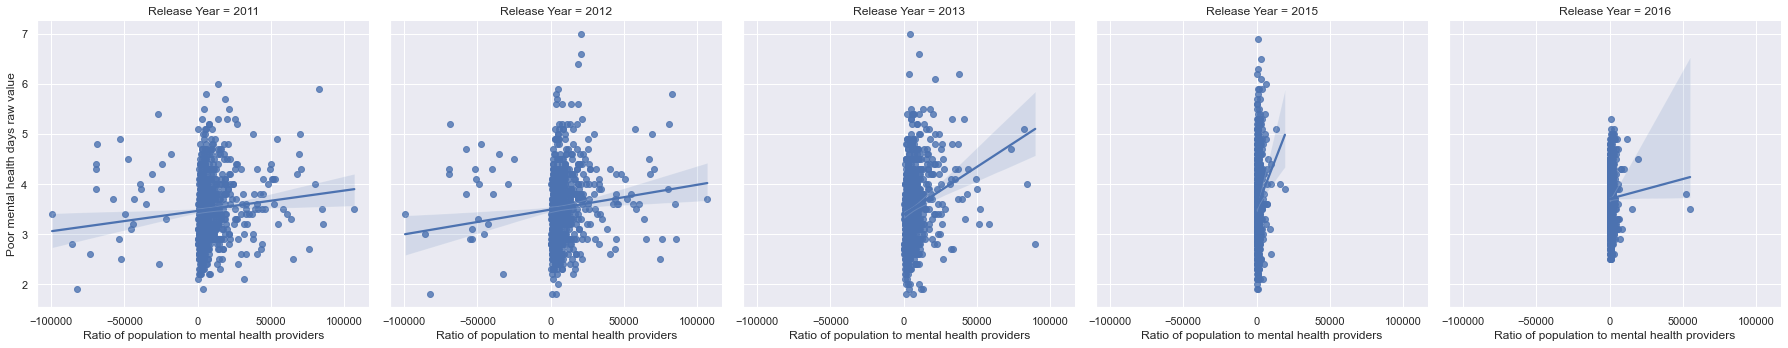

In [15]:
g = sns.lmplot(x="Ratio of population to mental health providers", y="Poor mental health days raw value", col="Release Year", data=df_mental_provider)
g.map_dataframe(annotate)
plt.show()

In [12]:
df_mental_provider.loc[df_mental_provider["Ratio of population to mental health providers"] < 0, interested_cols].count()

State Abbreviation                                51
Name                                              51
Release Year                                      51
Mental health providers raw value                 51
Mental health providers numerator                 51
Mental health providers denominator               51
Ratio of population to mental health providers    51
RUCC                                              51
dtype: int64

In [14]:
df_mental_provider.loc[df_mental_provider["Mental health providers numerator"] == 0, interested_cols].count()

State Abbreviation                                51
Name                                              51
Release Year                                      51
Mental health providers raw value                 51
Mental health providers numerator                 51
Mental health providers denominator               51
Ratio of population to mental health providers    51
RUCC                                              51
dtype: int64

In [21]:
threshold = (df_mental_provider['Release Year'] == 2011) & (df_mental_provider['Mental health providers raw value'] < 0.001)

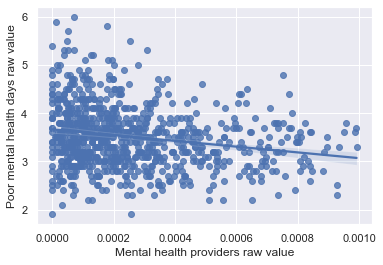

In [22]:
p = sns.regplot(x="Mental health providers raw value", y="Poor mental health days raw value", data=df_mental_provider[threshold])

plt.show()

## Divergent with Urbanization Level

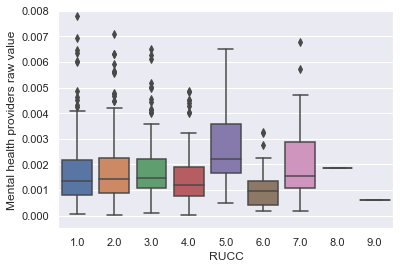

In [52]:
g = sns.boxplot(x="RUCC", y="Mental health providers raw value", data=df_mental_provider[df_mental_provider['Release Year'] == 2016])
g.set_ylim([-0.0005, 0.008])
plt.show()

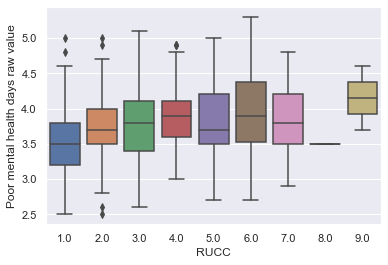

In [53]:
g = sns.boxplot(x="RUCC", y="Poor mental health days raw value", data=df_mental_provider[df_mental_provider['Release Year'] == 2016])
#g.set_ylim([-0.0005, 0.008])
plt.show()

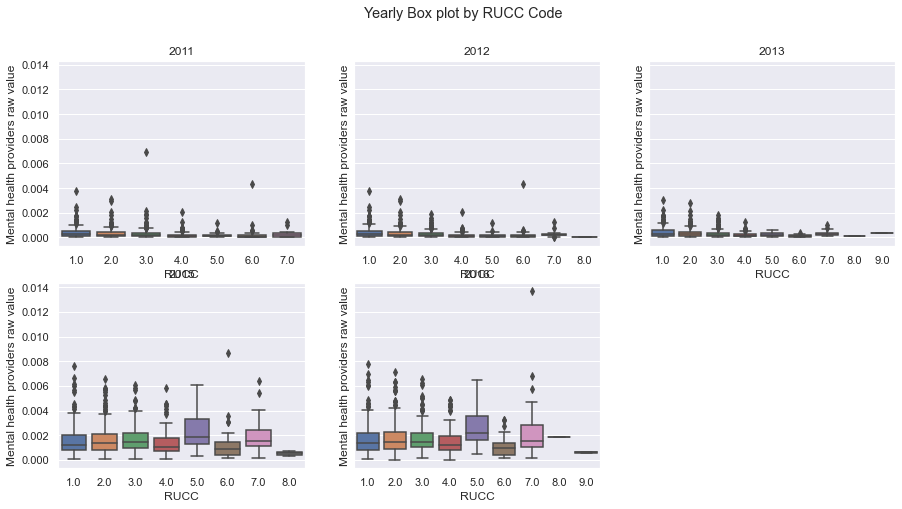

In [46]:
years = sorted(df_mental_provider['Release Year'].unique()) # get unique year
colors = plt.get_cmap('tab10') # Tableau 10 color scheme
fig, axes = plt.subplots(2, (len(years) + 1) // 2, figsize=(15, 7.5), sharey=True) # create subplot grid
for j, ax in enumerate(axes.flatten()):
    if j >= len(years):
        fig.delaxes(ax) # remove all extra axes
    else:
        sns.boxplot(x="RUCC", y="Mental health providers raw value", ax=ax, data=df_mental_provider[df_mental_provider['Release Year'] == years[j]])
        ax.set_title(years[j])
fig.suptitle('Yearly Box plot by RUCC Code')
plt.show()